In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats
import scipy

In [27]:
#read data with pandas library
names = ['Name','NOB','V','SH','CS','CDR','TD','NOC','CBO','RFC','LOC','CLOC','FanIn','FanOut','LCOM','WMC','DIT']
df = pd.read_excel('dataset.xlsx',names=names)
modifiedDF = df.dropna()
df = modifiedDF
#df = modifiedDF[['Name','CDR','TD','NOB','V','SH','CS','NOC','CBO','LCOM','FanIn','FanOut','RFC','DIT','WMC','LOC','CLOC']]
namess =df['Name']
df = df.set_index("Name")

In [28]:
df.head(3) #First 3 samples of the our dataset:

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
Name,,,,,,,,,,,,,,,,
Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


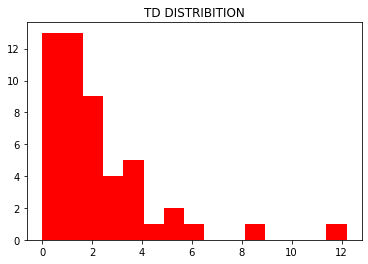

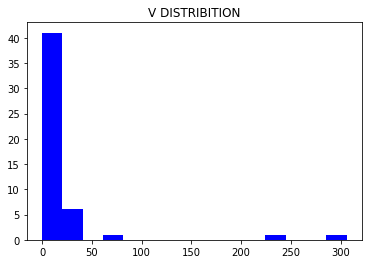

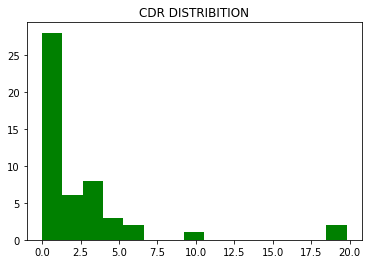

In [29]:
#show the distribution of 3 metrics
#def plotHist(columnIndex,columnName,colorName):
plt.hist(df['TD'],bins = 15, color = 'red')
plt.title('TD DISTRIBITION')
plt.show()
plt.hist(df['V'],bins = 15, color = 'blue')
plt.title('V DISTRIBITION')
plt.show()
plt.hist(df['CDR'],bins = 15, color = 'green')
plt.title('CDR DISTRIBITION')
plt.show()
#according to distribition of metrics we need to use spearman analysis type


In [30]:
#Min max scaler for all data
features = df.iloc[:,:].values
scaler = MinMaxScaler()
arrays = scaler.fit_transform(features)
bosdict= {}
for j in range(16):
    boslist = []
    for i in arrays:
        boslist.append(i[j])
    bosdict[list(df.columns.values)[j]] = boslist
df4 = pd.DataFrame(bosdict)
df4['Name'] = namess
df4 = df4.set_index('Name')
df10 = df4.copy()
df4

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
Name,,,,,,,,,,,,,,,,
Alarmio-master,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
android-pdf-viewer-master,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
android-permission-handler-master,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
Android-WhatsApp-master,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
android-youtubeExtractor-master,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
androidtv-sample-inputs-master,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
BirthdayBuddy-master,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
dex2jar,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359


# Part1 (Statistical Correlation Analysis)

In [31]:
#Show the correlation matrix of all metrics
df2 = df4.copy()


dicti = {}
for i in df2:
    empty = []
    for j in df2:
        empty.append(scipy.stats.spearmanr(df[i],df[j])[0])
        dicti[i] = empty
df3 = pd.DataFrame(dicti)
key = list(dicti.keys())
df3[' '] = key
df3 = df3.set_index(' ')
df3

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
,,,,,,,,,,,,,,,,
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368


In [32]:
#P values of Spearman Correlation Table
df2 = df4.copy()
dicti = {}
for i in df2:
    empty = []
    for j in df2:
        empty.append(round(scipy.stats.spearmanr(df[i],df[j])[1],4))
        dicti[i] = empty
df6 = pd.DataFrame(dicti)
key = list(dicti.keys())
df6[' '] = key
df6 = df6.set_index(' ')
for i in range(16):
    #print(df6[i].index)
    for j in df6:
        if df6.index[i] == j:
            df6[j][i] = 1.0000
df6



,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
,,,,,,,,,,,,,,,,
NOB,1.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,1.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,1.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,1.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,1.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,1.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,1.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,1.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,1.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970


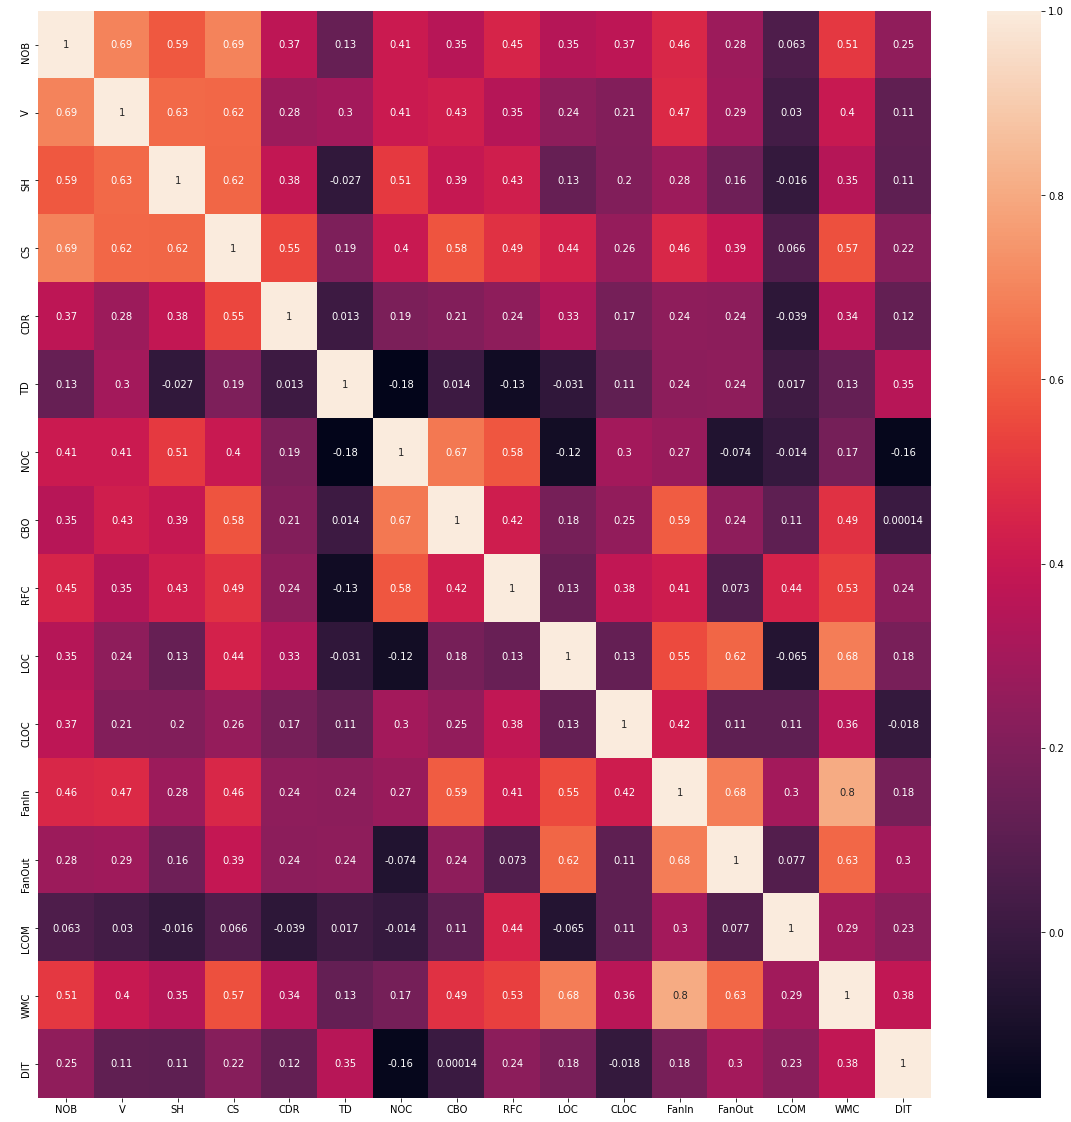

In [33]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
plt.figure(figsize=(20,20))
sns.heatmap(df3,annot= True )
plt.show()

In [34]:
#Correlation between External Metrics & TD
dictj = {}
df5 = df2.copy()
asd = ['NOB','V','SH','CS','CDR','TD']
for i in df5:
    if i not in asd:
        del df5[i]
df5 = df5[['CDR','TD','NOB','V','SH','CS']]
for i in df5:
    empty = []
    for j in df5:
        empty.append(scipy.stats.spearmanr(df[i],df[j])[0])
        dictj[i] = empty
dictj = {key:dictj[key] for key in ['CDR','TD','NOB','V','SH','CS']}
df3 = pd.DataFrame(dictj)
keys = list(dictj.keys())
df3[' '] = keys
df3 = df3.set_index(' ')
df3


,CDR,TD,NOB,V,SH,CS
,,,,,,
CDR,1.000000,0.013400,0.373251,0.280358,0.384657,0.548113
TD,0.013400,1.000000,0.133383,0.296757,-0.026546,0.194611
NOB,0.373251,0.133383,1.000000,0.694733,0.587592,0.691274
V,0.280358,0.296757,0.694733,1.000000,0.629663,0.624194
SH,0.384657,-0.026546,0.587592,0.629663,1.000000,0.618509
CS,0.548113,0.194611,0.691274,0.624194,0.618509,1.000000


In [35]:
#Correlation between Internal Metrics & TD
dictj = {}
df7 = df2.copy()
asd = ['CDR','TD','NOC','CBO','RFC','LOC','CLOC','FanIn','FanOut','LCOM','WMC','DIT']
for i in df7:
    if i not in asd:
        del df7[i]
for i in df7:
    empty = []
    for j in df7:
        empty.append(scipy.stats.spearmanr(df[i],df[j])[0])
        dictj[i] = empty
dictj = {key:dictj[key] for key in ['CDR','TD','NOC','CBO','RFC','LOC','CLOC','FanIn','FanOut','LCOM','WMC','DIT']}
df7 = pd.DataFrame(dictj)
keys = list(dictj.keys())
df7[' '] = keys
df7 = df7.set_index(' ')
df7

,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
,,,,,,,,,,,,
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler

random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,y_train):
  #Plot the Scatter Graph to see results better
    pass

#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(X_train,y_train,X_test,y_test):
  # Create the regressor: reg_all
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.intercept_ + np.sum(model.coef_ * X_test, axis=1)
    plt.title('Accuracy of Linear Regression')
    print('R-Squared Value :',r2_score(y_test,y_pred))
    print('Root Mean Squared Error',mean_squared_error(y_test, y_pred)**(1/2))
    plt.scatter(y_test,y_pred,color='red',label='Predicted Value')
    plt.legend()
    plt.scatter(y_test,y_test,color='blue',label='Original Value')
    plt.legend()


#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(X_train,y_train,X_test,y_test):
    regressor = SVR(kernel='rbf')
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print('R-Squared Value :',r2_score(y_test,y_pred))
    print('Root Mean Squared Error',mean_squared_error(y_test, y_pred)**(1/2))
    plt.scatter(y_test, y_test, color = 'blue',label='Original Value')
    plt.legend()
    plt.scatter(y_test, regressor.predict(X_test), color = 'red',label='Predicted Value')
    plt.legend()
    plt.title('Accuracy of SVR Regression RBF Kernel ')
    plt.show()
    regressor = SVR(kernel='linear')
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print('R-Squared Value :',r2_score(y_test,y_pred))
    print('Root Mean Squared Error',mean_squared_error(y_test, y_pred)**(1/2))
    plt.scatter(y_test, y_test, color = 'blue',label='Original Value')
    plt.legend()
    plt.scatter(y_test, regressor.predict(X_test), color = 'red',label='Predicted Value')
    plt.legend()
    plt.title('Accuracy of SVR Regression Linear Kernel')


def decisionTreeRegression(X_train,y_train,X_test,y_test):
    regressor = DecisionTreeRegressor(random_state=random_state_fixed)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print('R-Squared Value :',r2_score(y_test,y_pred))
    print('Root Mean Squared Error',mean_squared_error(y_test, y_pred)**(1/2))
    plt.scatter(y_test, y_test, color = 'red',label='Original Value')
    plt.legend()
    plt.scatter(y_test, regressor.predict(X_test), color = 'blue',label='Predicted Value')
    plt.legend()
    plt.title('Accuracy of decisionTreeRegression ')



def randomDecTreeRegression(X_train,y_train,X_test,y_test):
    regressor = RandomForestRegressor(random_state=random_state_fixed)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print('R-Squared Value :',r2_score(y_test,y_pred))
    print('Root Mean Squared Error',mean_squared_error(y_test, y_pred)**(1/2))
    plt.scatter(y_test, y_test, color = 'red',label='Original Value')
    plt.legend()
    plt.scatter(y_test, regressor.predict(X_test), color = 'blue',label='Predicted Value')
    plt.legend()
    plt.title('Accuracy of RandomForestRegressor ')



#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(X_train,y_train,X_test,y_test):
    regressor = MLPRegressor(random_state=random_state_fixed)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print('R-Squared Value :',r2_score(y_test,y_pred))
    print('Root Mean Squared Error',mean_squared_error(y_test, y_pred)**(1/2))
    plt.scatter(y_test, y_test, color = 'red',label='Original Value')
    plt.legend()
    plt.scatter(y_test, regressor.predict(X_test), color = 'blue',label='Predicted Value')
    plt.legend()
    plt.title('Accuracy of mlpRegressor ')




In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [37]:
#split data into train and test data
X = df4.iloc[:, 6:].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)

R-Squared Value : -0.25353936900603147
Root Mean Squared Error 0.2822820349754406


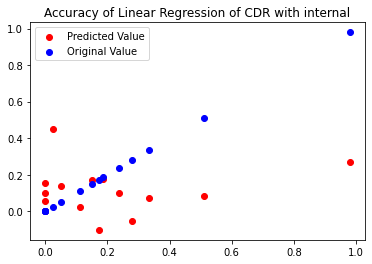

R-Squared Value : -0.1729675304692071
Root Mean Squared Error 0.2650640776760429


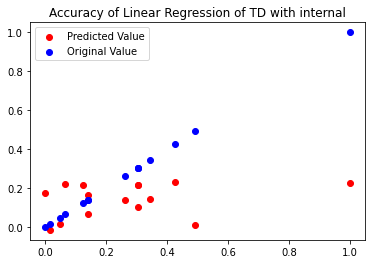

In [38]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Linear Regression of CDR with internal')
plt.show()
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
linearRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Linear Regression of TD with internal')
plt.show()

R-Squared Value : -0.16455641994479597
Root Mean Squared Error 0.2720786834980814


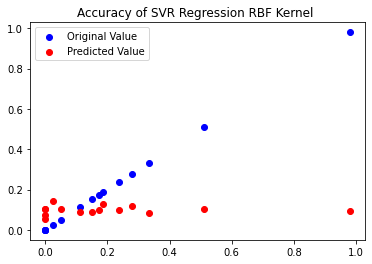

R-Squared Value : -0.12212300389682662
Root Mean Squared Error 0.2670757664434763


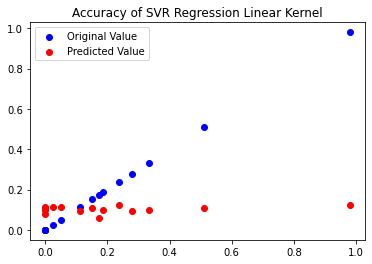

R-Squared Value : -0.07658669531666251
Root Mean Squared Error 0.25394074173641473


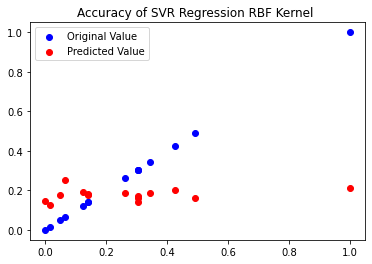

R-Squared Value : -0.3526354995047598
Root Mean Squared Error 0.2846415332813681


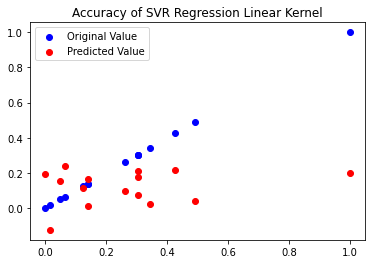

In [39]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
X = df4.iloc[:, 6:].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
svrRegression(X_train,y_train,X_test,y_test)
plt.show()
X = df4.iloc[:, 6:].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
svrRegression(X_train,y_train,X_test,y_test)
plt.show()

R-Squared Value : -0.12150757783825572
Root Mean Squared Error 0.26700251782083956


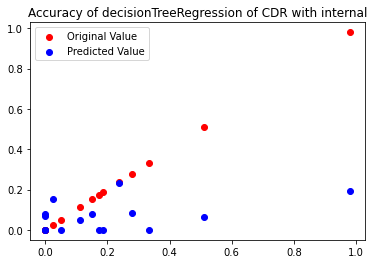

R-Squared Value : -0.5204592360688753
Root Mean Squared Error 0.30178334647732696


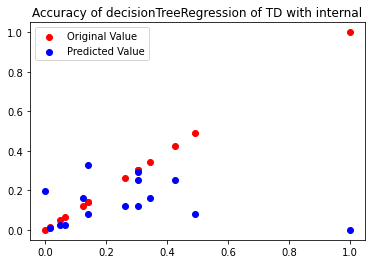

In [40]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
X = df4.iloc[:, 6:].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
decisionTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of decisionTreeRegression of CDR with internal')
plt.show()
X = df4.iloc[:, 6:].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
decisionTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of decisionTreeRegression of TD with internal')
plt.show()

R-Squared Value : -0.05101676969007363
Root Mean Squared Error 0.25847531504491733


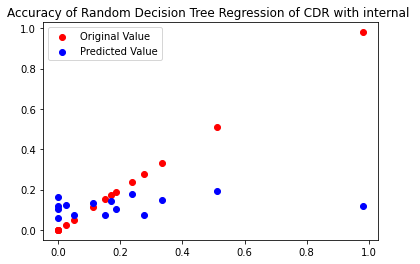

R-Squared Value : -0.16969786733401793
Root Mean Squared Error 0.26469438498303655


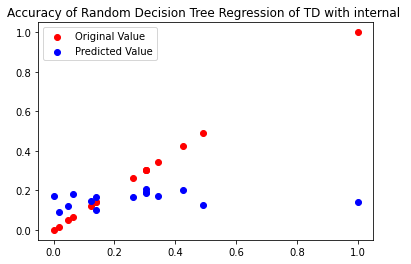

In [41]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
X = df4.iloc[:, 6:].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
randomDecTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Random Decision Tree Regression of CDR with internal ')
plt.show()
X = df4.iloc[:, 6:].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
randomDecTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Random Decision Tree Regression of TD with internal ')
plt.show()

R-Squared Value : -0.22435327148884165
Root Mean Squared Error 0.27897650141415087


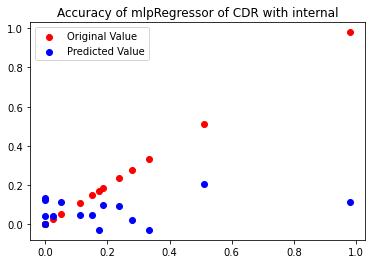

R-Squared Value : -0.4871772319255998
Root Mean Squared Error 0.2984621365383263


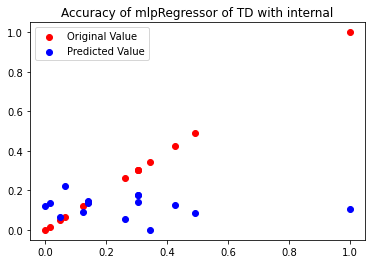

In [42]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
X = df4.iloc[:, 6:].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
mlpRegressor(X_train,y_train,X_test,y_test)
plt.title('Accuracy of mlpRegressor of CDR with internal')
plt.show()
X = df4.iloc[:, 6:].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
mlpRegressor(X_train,y_train,X_test,y_test)
plt.title('Accuracy of mlpRegressor of TD with internal')
plt.show()

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [43]:
#split data into train and test data

X = df4.iloc[:, :4].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed )

R-Squared Value : -0.29877407933861844
Root Mean Squared Error 0.2873300555429503


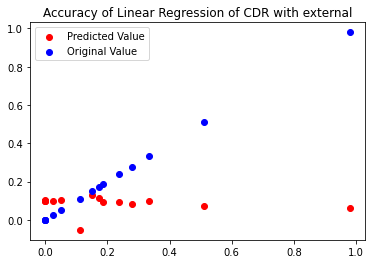

R-Squared Value : -0.4331628534217624
Root Mean Squared Error 0.2929919249634493


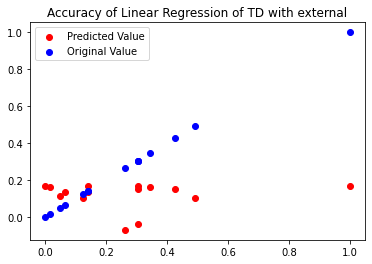

In [44]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Linear Regression of CDR with external')
plt.show()
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
linearRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Linear Regression of TD with external')
plt.show()



R-Squared Value : -0.05742000726843233
Root Mean Squared Error 0.2592614897703499


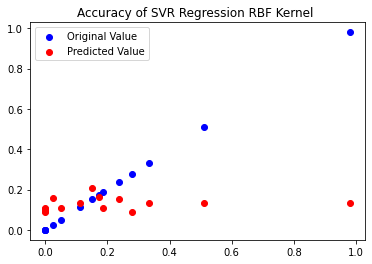

R-Squared Value : -0.10105796501066222
Root Mean Squared Error 0.2645570517029422


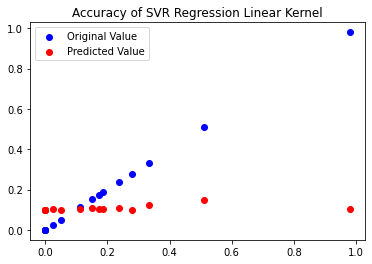

R-Squared Value : -0.45281551449179935
Root Mean Squared Error 0.2949939533353097


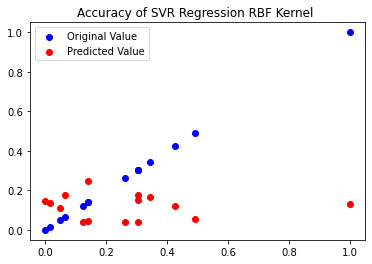

R-Squared Value : -0.3170558678590276
Root Mean Squared Error 0.28087299055485854


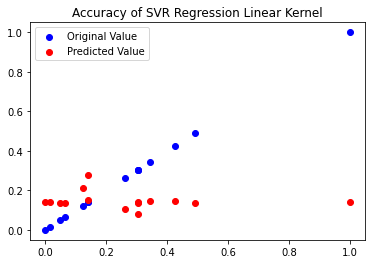

In [45]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
X = df4.iloc[:, :4].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
svrRegression(X_train,y_train,X_test,y_test)
plt.show()
X = df4.iloc[:, :4].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
svrRegression(X_train,y_train,X_test,y_test)
plt.show()

R-Squared Value : -0.49827719657436775
Root Mean Squared Error 0.3086102422213462


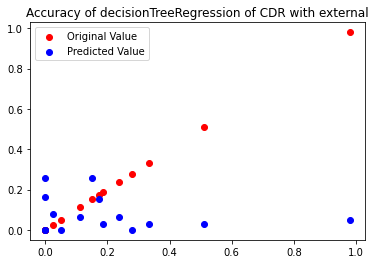

R-Squared Value : -0.7371656181142008
Root Mean Squared Error 0.32257335573307827


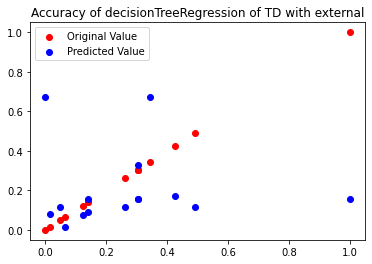

In [46]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
X = df4.iloc[:, :4].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
decisionTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of decisionTreeRegression of CDR with external')
plt.show()
X = df4.iloc[:, :4].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
decisionTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of decisionTreeRegression of TD with external')
plt.show()

R-Squared Value : -0.26333860652667807
Root Mean Squared Error 0.28338322249338543


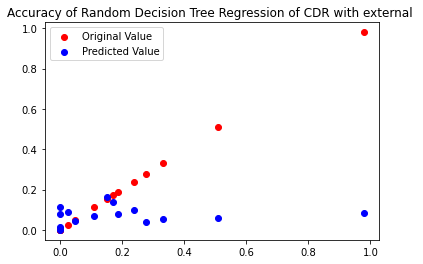

R-Squared Value : -0.11428872623308783
Root Mean Squared Error 0.2583489780064541


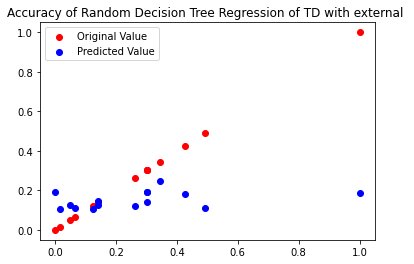

In [47]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
X = df4.iloc[:, :4].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
randomDecTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Random Decision Tree Regression of CDR with external ')
plt.show()
X = df4.iloc[:, :4].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
randomDecTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Random Decision Tree Regression of TD with external ')
plt.show()


R-Squared Value : -0.1733124776552255
Root Mean Squared Error 0.2730996195799929


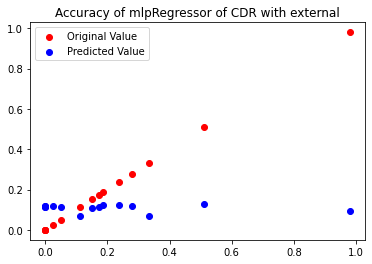

R-Squared Value : -0.1905169499496393
Root Mean Squared Error 0.2670396014132049


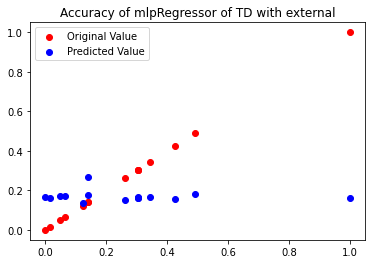

In [48]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
X = df4.iloc[:, :4].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
mlpRegressor(X_train,y_train,X_test,y_test)
plt.title('Accuracy of mlpRegressor of CDR with external')
plt.show()
X = df4.iloc[:, :4].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
mlpRegressor(X_train,y_train,X_test,y_test)
plt.title('Accuracy of mlpRegressor of TD with external')
plt.show()

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [49]:
#split data into train and test data
df6 = df4.copy()
df6=df6.drop(axis=1,labels=["CDR","TD"])
X = df6.iloc[:, :].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)

R-Squared Value : -2.0091415912957955
Root Mean Squared Error 0.4373564766984461


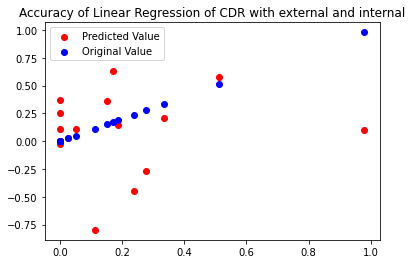

R-Squared Value : -0.003633279100097697
Root Mean Squared Error 0.24518585195724793


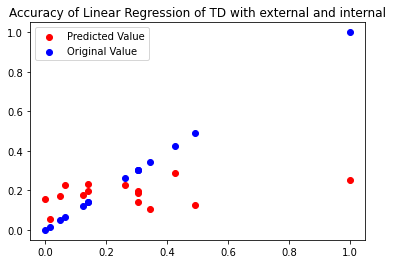

In [50]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Linear Regression of CDR with external and internal')
plt.show()
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
linearRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Linear Regression of TD with external and internal')
plt.show()

R-Squared Value : -0.23945919966775864
Root Mean Squared Error 0.2806922153718834


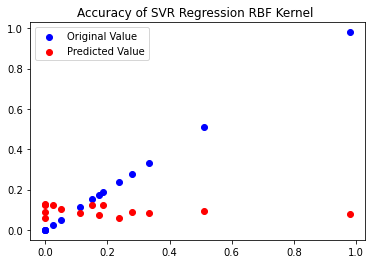

R-Squared Value : -0.1605709781449498
Root Mean Squared Error 0.2716127193456499


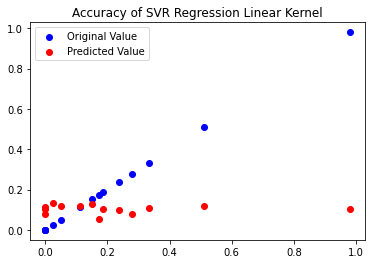

R-Squared Value : -0.09720921648004222
Root Mean Squared Error 0.2563613813817413


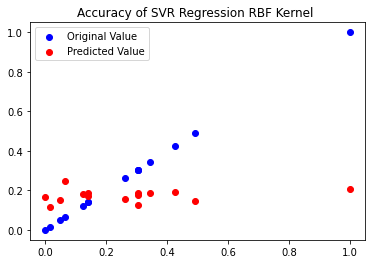

R-Squared Value : -0.36281172246930304
Root Mean Squared Error 0.2857102425477753


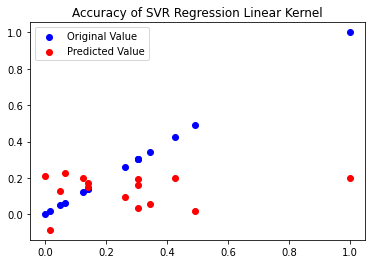

In [51]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
df6 = df4.copy()
df6=df6.drop(axis=1,labels=["CDR","TD"])
X = df6.iloc[:, :].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
svrRegression(X_train,y_train,X_test,y_test)
plt.show()
df6 = df4.copy()
df6=df6.drop(axis=1,labels=["CDR","TD"])
X = df6.iloc[:, :].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
svrRegression(X_train,y_train,X_test,y_test)
plt.show()

R-Squared Value : -0.05417378556625985
Root Mean Squared Error 0.25886322456148736


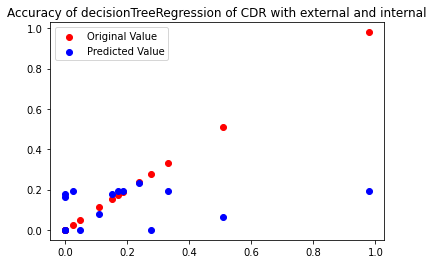

R-Squared Value : -0.2556706581453083
Root Mean Squared Error 0.2742494419820825


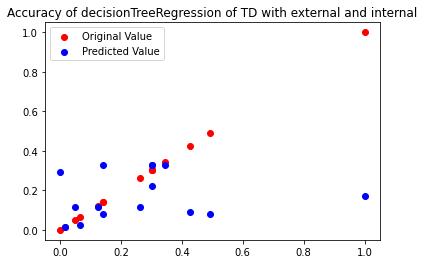

In [52]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
df6 = df4.copy()
df6=df6.drop(axis=1,labels=["CDR","TD"])
X = df6.iloc[:, :].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
decisionTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of decisionTreeRegression of CDR with external and internal')
plt.show()
df6 = df4.copy()
df6=df6.drop(axis=1,labels=["CDR","TD"])
X = df6.iloc[:, :].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
decisionTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of decisionTreeRegression of TD with external and internal')
plt.show()

R-Squared Value : 0.01479470371704672
Root Mean Squared Error 0.2502520360002964


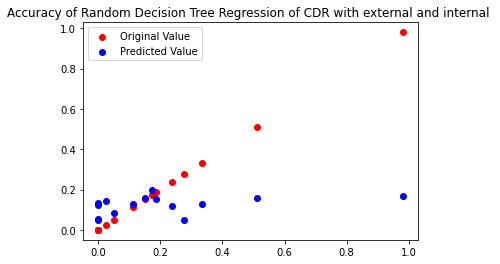

R-Squared Value : 0.07627455457291843
Root Mean Squared Error 0.23522275547294955


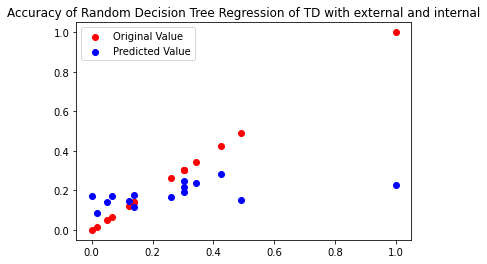

In [53]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
df6 = df4.copy()
df6=df6.drop(axis=1,labels=["CDR","TD"])
X = df6.iloc[:, :].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
randomDecTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Random Decision Tree Regression of CDR with external and internal ')
plt.show()
df6 = df4.copy()
df6=df6.drop(axis=1,labels=["CDR","TD"])
X = df6.iloc[:, :].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
randomDecTreeRegression(X_train,y_train,X_test,y_test)
plt.title('Accuracy of Random Decision Tree Regression of TD with external and internal')
plt.show()

R-Squared Value : -0.47729270505957055
Root Mean Squared Error 0.30644146309720954


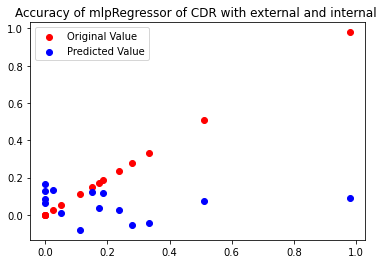

R-Squared Value : -0.09356621979107316
Root Mean Squared Error 0.25593543701691623


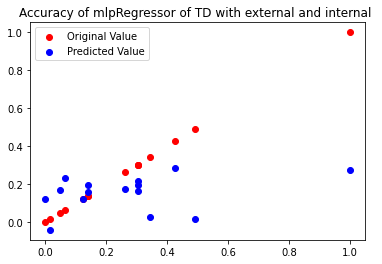

In [54]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
df6 = df4.copy()
df6=df6.drop(axis=1,labels=["CDR","TD"])
X = df6.iloc[:, :].values
y = df4['CDR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
mlpRegressor(X_train,y_train,X_test,y_test)
plt.title('Accuracy of mlpRegressor of CDR with external and internal ')
plt.show()
df6 = df4.copy()
df6=df6.drop(axis=1,labels=["CDR","TD"])
X = df6.iloc[:, :].values
y = df4['TD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state =random_state_fixed)
mlpRegressor(X_train,y_train,X_test,y_test)
plt.title('Accuracy of mlpRegressor of TD with external and internal ')
plt.show()